In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-barid-csv/data.csv


In [2]:
!pip install imbalanced-learn==0.10.1 scikit-learn==1.2.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 51.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/data-barid-csv/data.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,45680,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,45668,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,45682,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,45676,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,45687,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  int64  
 10  Transaction_Time         200000 non-null  float64
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [6]:
df['Is_Fraud'].value_counts()

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

In [7]:
null_counts = df.isnull().sum()
print("Null values per column:\n", null_counts)

total_nulls = df.isnull().sum().sum()
print(f"Total number of null values: {total_nulls}")

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

print(df[df.duplicated()])


Null values per column:
 Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64
Total number of null values: 0
Number of duplicate rows: 0
Empty DataFrame
Columns: [Customer_ID, Customer_Name, Gender, Age, State, City, Bank_Branch, Account_Type, Transaction_ID, Transaction_Date, Transaction_Time, Transaction_Amount, Merchant_ID, Transaction_Typ

In [8]:
# cols_plot = ['Transaction_Amount', 'Age', 'Account_Balance']

# for col in cols_plot:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(df[col], bins=50, kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

# for col in cols_plot:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(data=df, x='Is_Fraud', y=col)
#     plt.title(f'{col} by Fraud Label')
#     plt.xlabel('Is_Fraud (0 = No, 1 = Yes)')
#     plt.ylabel(col)
#     plt.grid(True)
#     plt.show()

In [9]:
no_features =['Customer_ID', 'Customer_Name', 'Transaction_ID', 'Merchant_ID', 'Customer_Contact', 'Customer_Email','Transaction_Currency']

In [10]:
df.drop(no_features, axis=1, inplace=True)

In [11]:
df['Transaction_Type'].value_counts()

Transaction_Type
Credit          40180
Debit           40050
Bill Payment    40040
Transfer        39953
Withdrawal      39777
Name: count, dtype: int64

In [12]:
target_enc = ['Transaction_Description', 'Transaction_Location', 'State', 'City','Bank_Branch']
label_enc = ['Gender', 'Merchant_Category', 'Transaction_Device','Account_Type','Device_Type','Transaction_Type']

In [13]:
def target_encode_smooth(df, col, target, alpha=10):
    # Global mean
    global_mean = df[target].mean()

    # Compute count and mean per category
    agg = df.groupby(col)[target].agg(['mean', 'count'])
    
    # Compute smoothed means
    smooth = (agg['count'] * agg['mean'] + alpha * global_mean) / (agg['count'] + alpha)
    
    # Map to original column
    return df[col].map(smooth)


In [14]:
# Apply to each column in your target_enc list
target_enc = ['Transaction_Description', 'Transaction_Location', 'State', 'City', 'Bank_Branch']

for col in target_enc:
    df[col] = target_encode_smooth(df, col, 'Is_Fraud', alpha=10)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in label_enc:
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of missing or mixed types


In [16]:
from datetime import datetime, timedelta

df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], origin='1899-12-30', unit='D')


df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year

df = df.drop(columns=['Transaction_Date' ,'Month', 'Year'])

In [17]:
minMax_scl = ['Age','Transaction_Amount','Account_Balance']

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[minMax_scl] = scaler.fit_transform(df[minMax_scl])


In [19]:
df.shape
print(df.head(5))

   Gender       Age     State      City  Bank_Branch  Account_Type  \
0       1  0.807692  0.045348  0.048265     0.048265             2   
1       0  0.634615  0.050829  0.048021     0.048021             0   
2       1  0.038462  0.046617  0.042214     0.042214             2   
3       0  0.750000  0.056145  0.050815     0.050815             0   
4       0  0.480769  0.047198  0.043574     0.043574             2   

   Transaction_Time  Transaction_Amount  Transaction_Type  Merchant_Category  \
0          0.669525            0.327359                 3                  5   
1          0.718669            0.440574                 0                  5   
2          0.131852            0.636958                 0                  3   
3          0.518773            0.141332                 2                  2   
4          0.771366            0.185119                 3                  2   

   Account_Balance  Transaction_Device  Transaction_Location  Device_Type  \
0         0.732180   

In [20]:
correlation_matrix = df[['Transaction_Location', 'City', 'Bank_Branch']].corr()
print(correlation_matrix)

                      Transaction_Location      City  Bank_Branch
Transaction_Location              1.000000  0.994064     0.994064
City                              0.994064  1.000000     1.000000
Bank_Branch                       0.994064  1.000000     1.000000


In [21]:
df.corr()['Is_Fraud'].sort_values(ascending=False)

Is_Fraud                   1.000000
Transaction_Location       0.027889
City                       0.027723
Bank_Branch                0.027723
Transaction_Description    0.027471
State                      0.012339
Transaction_Device         0.001304
Gender                     0.000649
Transaction_Type           0.000630
Account_Balance            0.000125
Device_Type               -0.000194
Merchant_Category         -0.001342
Age                       -0.001517
Transaction_Time          -0.001909
Transaction_Amount        -0.002100
Day_of_Week               -0.002582
Account_Type              -0.002592
Name: Is_Fraud, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [25]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [27]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [28]:
from collections import Counter

In [32]:
counter = Counter(y_train_res)
class_weight_ratio = counter[0] / counter[1]
print(class_weight_ratio)

1.0


In [33]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

In [ ]:
# scale_pos_weight = len(y_res[y_res == 0]) / len(y_res[y_res == 1])
# print(scale_pos_weight)

In [42]:
model = XGBClassifier(objective='binary:logistic', 
                      scale_pos_weight=1, 
                      random_state=42)

model.fit(X_train_res, y_train_res)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.4).astype(int)


In [38]:

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    f1_score,
    recall_score
)


              precision    recall  f1-score   support

           0       0.95      0.28      0.43     28487
           1       0.05      0.75      0.10      1513

    accuracy                           0.30     30000
   macro avg       0.50      0.51      0.26     30000
weighted avg       0.91      0.30      0.41     30000



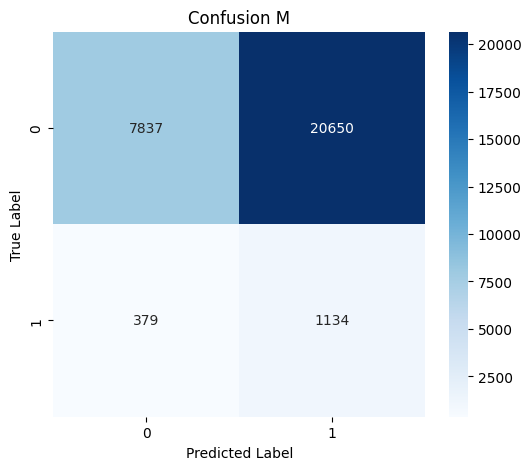

In [43]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion M")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()